In [5]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [6]:
import OptLinearRegress
from OptLinearRegress import LinearRegressor

from sklearn.linear_model import LinearRegression
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
import time

In [7]:
dir(OptLinearRegress)

['LinearRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'linear_regressor']

# Simple OLS


Benchmarking for n_features = 8
Samples:    100 | Cython:   0.017 ms | Sklearn:   2.719 ms
Samples:   1000 | Cython:   0.087 ms | Sklearn:   1.326 ms
Samples:   5000 | Cython:   0.854 ms | Sklearn:   2.984 ms
Samples:  10000 | Cython:   1.741 ms | Sklearn:   4.457 ms
Samples:  50000 | Cython:  10.290 ms | Sklearn:  20.147 ms
Samples: 100000 | Cython:  16.669 ms | Sklearn:  38.319 ms
Samples: 500000 | Cython: 140.089 ms | Sklearn: 210.599 ms
Samples: 1000000 | Cython: 327.020 ms | Sklearn: 432.428 ms
Samples: 5000000 | Cython: 1907.701 ms | Sklearn: 2559.340 ms


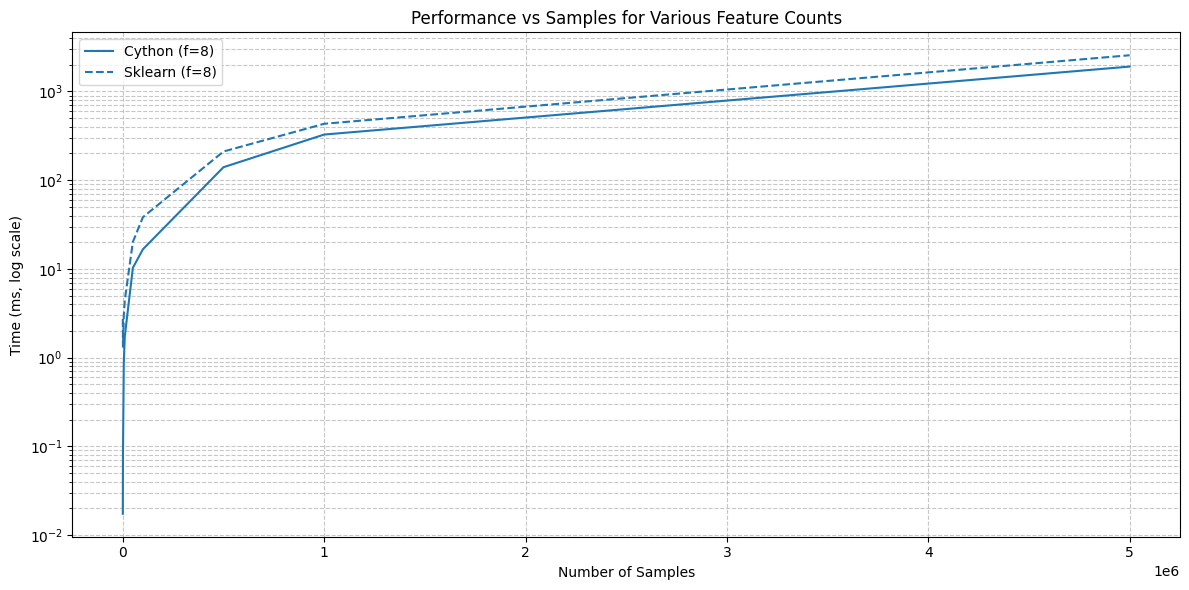

In [4]:
random.seed(42)

def generate_data(n_samples, n_features):
    """
    Generate linear data: y = sum(weights * x_i) + noise
    Weights: 1, 2, ..., n_features
    """
    X = []
    y = []
    weights = list(range(1, n_features + 1))
    
    for _ in range(n_samples):
        features = [random.uniform(-10, 10) for _ in range(n_features)]
        noise = random.uniform(-0.5, 0.5)
        label = sum(w * x for w, x in zip(weights, features)) + noise
        X.append(features)
        y.append(label)
        
    return X, y

def benchmark():
    sizes = [100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]    # Changeable
    feature_counts = [8]       # Changeable
    
    results = {}  # {(n_features): (sizes, cython_times, sklearn_times)}
    
    for n_features in feature_counts:
        cython_times = []
        sklearn_times = []
        
        print(f"\nBenchmarking for n_features = {n_features}")
        
        for size in sizes:
            X, y = generate_data(size, n_features)

            # Cython Timing (simulated here using sklearn for placeholder)
            start = time.time()
            model_1 = LinearRegressor().fit(X, y)
            cython_times.append((time.time() - start) * 1e3)  # ms

            # Sklearn Timing
            start = time.time()
            model_2 = LinearRegression(fit_intercept=False).fit(X, y)
            sklearn_times.append((time.time() - start) * 1e3)  # ms

            print(f"Samples: {size:6d} | Cython: {cython_times[-1]:7.3f} ms | Sklearn: {sklearn_times[-1]:7.3f} ms")
        
        results[n_features] = (sizes, cython_times, sklearn_times)
        
    return results

def plot_by_features(results):
    plt.figure(figsize=(12, 6))
    
    color_cycle = itertools.cycle(plt.cm.tab10.colors)  # Use matplotlib color cycle

    for n_features, (sizes, cy_times, sk_times) in results.items():
        color = next(color_cycle)
        
        plt.plot(sizes, cy_times, '-', color=color, label=f'Cython (f={n_features})')
        plt.plot(sizes, sk_times, '--', color=color, label=f'Sklearn (f={n_features})')
        
    plt.title("Performance vs Samples for Various Feature Counts")
    plt.xlabel("Number of Samples")
    plt.ylabel("Time (ms, log scale)")
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run Benchmarking and Plot
results = benchmark()
plot_by_features(results)

Faster for lower samples and features

# Ridge Regression


Benchmarking for n_features = 8
Samples:    100 | Cython:   0.033 ms | Sklearn:   2.737 ms
Samples:   1000 | Cython:   0.084 ms | Sklearn:   1.373 ms
Samples:   5000 | Cython:   1.327 ms | Sklearn:   3.434 ms
Samples:  10000 | Cython:   1.508 ms | Sklearn:   4.911 ms
Samples:  50000 | Cython:   8.842 ms | Sklearn:  21.038 ms
Samples: 100000 | Cython:  14.534 ms | Sklearn:  41.506 ms
Samples: 500000 | Cython: 137.678 ms | Sklearn: 206.140 ms
Samples: 1000000 | Cython: 341.179 ms | Sklearn: 462.929 ms
Samples: 5000000 | Cython: 1894.061 ms | Sklearn: 2615.717 ms


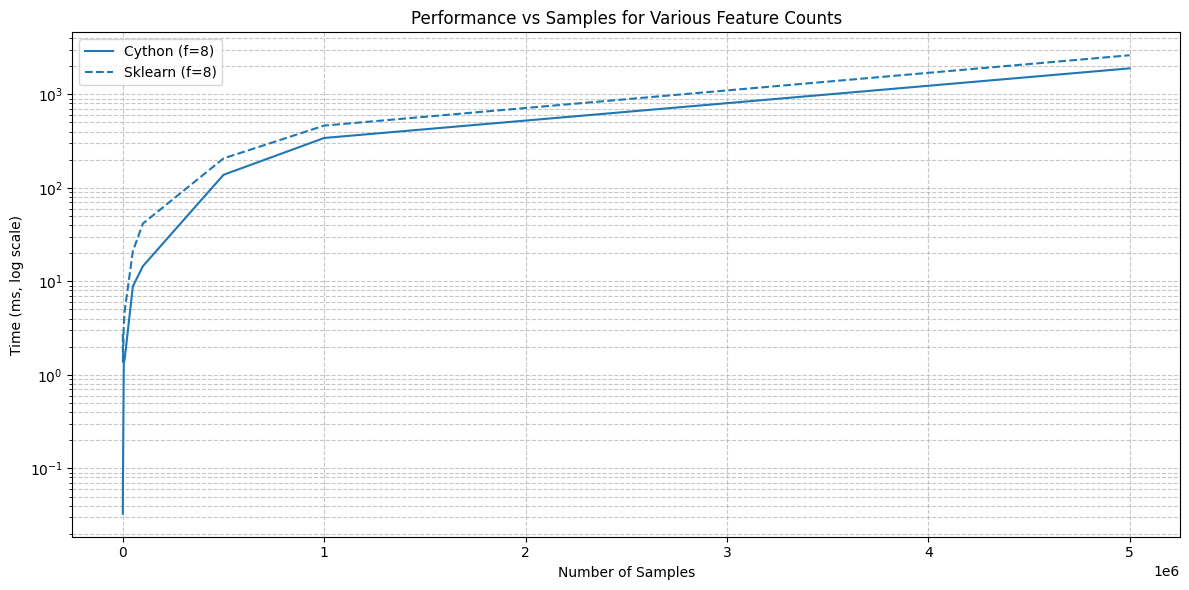

In [8]:
random.seed(42)

def generate_data(n_samples, n_features):
    """
    Generate linear data: y = sum(weights * x_i) + noise
    Weights: 1, 2, ..., n_features
    """
    X = []
    y = []
    weights = list(range(1, n_features + 1))
    
    for _ in range(n_samples):
        features = [random.uniform(-10, 10) for _ in range(n_features)]
        noise = random.uniform(-0.5, 0.5)
        label = sum(w * x for w, x in zip(weights, features)) + noise
        X.append(features)
        y.append(label)
        
    return X, y

def benchmark():
    sizes = [100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]    # Changeable
    feature_counts = [8]       # Changeable
    
    results = {}  # {(n_features): (sizes, cython_times, sklearn_times)}
    
    for n_features in feature_counts:
        cython_times = []
        sklearn_times = []
        
        print(f"\nBenchmarking for n_features = {n_features}")
        
        for size in sizes:
            X, y = generate_data(size, n_features)

            # Cython Timing (simulated here using sklearn for placeholder)
            start = time.time()
            model_1 = LinearRegressor(alpha=1e-6).fit(X, y)
            cython_times.append((time.time() - start) * 1e3)  # ms

            # Sklearn Timing
            start = time.time()
            model_2 = LinearRegression(fit_intercept=False).fit(X, y)
            sklearn_times.append((time.time() - start) * 1e3)  # ms

            print(f"Samples: {size:6d} | Cython: {cython_times[-1]:7.3f} ms | Sklearn: {sklearn_times[-1]:7.3f} ms")
        
        results[n_features] = (sizes, cython_times, sklearn_times)
        
    return results

def plot_by_features(results):
    plt.figure(figsize=(12, 6))
    
    color_cycle = itertools.cycle(plt.cm.tab10.colors)  # Use matplotlib color cycle

    for n_features, (sizes, cy_times, sk_times) in results.items():
        color = next(color_cycle)
        
        plt.plot(sizes, cy_times, '-', color=color, label=f'Cython (f={n_features})')
        plt.plot(sizes, sk_times, '--', color=color, label=f'Sklearn (f={n_features})')
        
    plt.title("Performance vs Samples for Various Feature Counts")
    plt.xlabel("Number of Samples")
    plt.ylabel("Time (ms, log scale)")
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run Benchmarking and Plot
results = benchmark()
plot_by_features(results)